In [3]:
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import nltk
from collections import Counter
import re
from kiwipiepy import Kiwi
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lgdxschool2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [4]:
df  = pd.read_csv('./data/pan_all.csv')
df.head()

,content,content_clean,remove_one_word_tagged_content
0,코팅 프라이팬 좋은 거 뭐 있나요??제일 유명한 코팅 프라이팬이 먼가용? 가격대 상...,코팅 프라이팬 좋은 거 뭐 있나요제일 유명한 코팅 프라이팬이 먼가용 가격대 상관없이...,"['코팅', '프라이팬', '좋다', '제일', '유명하다', '코팅', '프라이팬..."
1,고기나 야채 삶아서 먹을 때 프라이팬 조리시보다 급격히...고기나 야채 삶아서 먹을...,고기나 야채 삶아서 먹을 때 프라이팬 조리시보다 급격히고기나 야채 삶아서 먹을 때 ...,"['고기', '야채', '삶다', '먹다', '프라이팬', '조리', '시보', '..."
2,프라이팬 화상 연고 추천요리하다가 프라이팬이 떨어지려고 하길래 놀라서 프라이팬 손잡...,프라이팬 화상 연고 추천요리하다가 프라이팬이 떨어지려고 하길래 놀라서 프라이팬 손잡...,"['프라이팬', '화상', '연고', '추천', '요리', '다가', '프라이팬',..."
3,닭가슴살이 프라이팬에서 자꾸 타는데 좋은 방법은?닭가슴살이 프라이팬에서 자꾸 타는데...,닭가슴살이 프라이팬에서 자꾸 타는데 좋은 방법은닭가슴살이 프라이팬에서 자꾸 타는데 ...,"['가슴', '살이', '프라이팬', '자꾸', '좋다', '방법', '가슴', '..."
4,프라이팬 기름때 제거 어떻게 할까요ㅠㅠ프라이팬에 기름때? 가 저렇게 생겼는데 제거 ...,프라이팬 기름때 제거 어떻게 할까요프라이팬에 기름때 가 저렇게 생겼는데 제거 어떻게...,"['프라이팬', '기름', '제거', '프라이팬', '기름', '가다', '생기다'..."


In [5]:
df.shape

(1352, 3)

In [9]:
df_tolist = df['content_clean'].values.tolist()
df_tolist[:8]

['코팅 프라이팬 좋은 거 뭐 있나요제일 유명한 코팅 프라이팬이 먼가용 가격대 상관없이 다 알려주세용',
 '고기나 야채 삶아서 먹을 때 프라이팬 조리시보다 급격히고기나 야채 삶아서 먹을 때 프라이팬 조리시보다 급격히 심장 빨리 뛰는 이유',
 '프라이팬 화상 연고 추천요리하다가 프라이팬이 떨어지려고 하길래 놀라서 프라이팬 손잡이불에 달궈지는 부분를 잡았거든요 사진으론 잘 안 보이지만 벌써 물집이 생겼어요 반대쪽 손은 그냥 빨개졌어요쓰라림 쓰라리고 아요 공휴일이라 주변에 문 연 병원이 없어서요 약국 가서 어떤 화상 연고랑 또 뭘 사야 될까요',
 '닭가슴살이 프라이팬에서 자꾸 타는데 좋은 방법은닭가슴살이 프라이팬에서 자꾸 타는데 좋은 방법은',
 '프라이팬 기름때 제거 어떻게 할까요프라이팬에 기름때 가 저렇게 생겼는데 제거 어떻게 할까요베이킹 소다로도 해봤는데 지워지지가 않습니다어떻게 하는 지 방법 좀 알려주세요 그리고 프라이팬 제품명도 좀 알 수 있을까요안 지워지면 똑같은 걸로 하나 살려구요',
 '인덕션프라이팬과 일반후라이팬 뭐가 달라요프라이팬 검색했는데 인덕션프라이팬이랑 일반후라이팬 다 나와서요  친구가 집들이 선물로 인덕션프라이팬사달라고하는데 일반후라이팬이랑 다른가요  제가 주방용품을 잘 몰라서 프라이팬도 알아보는데 뭐가 좋은지도 모르겠어요  집들이 선물로 괜찮은 인덕션프라이팬있으면 추천도 좀 부탁드려요',
 '프라이팬 추천 오래써도 괜찮은건 없나요집에 있는 프라이팬들이 산지 개월됐는데 벌써 코팅 다벗겨졌어요  좀 코팅력 좋고 오래가는거 있을까요 매번 사는것도 지겹네요 이젠  인터넷에는 다 코팅 좋다고하는데 뭐가 좋은지도 모르겠고   그냥 내돈내산 해본 프라이팬 추천 부탁드려요',
 '프라이팬 냄비 버리는법인덕션용 프라이팬 냄비 버리려하는데 나사 넣을 구멍도없고 어떻게 분리해서 버리면 될까요']

In [11]:
import numpy as np
df_tolist= np.array(df_tolist).flatten().tolist()
df_tolist[:8]

['코팅 프라이팬 좋은 거 뭐 있나요제일 유명한 코팅 프라이팬이 먼가용 가격대 상관없이 다 알려주세용',
 '고기나 야채 삶아서 먹을 때 프라이팬 조리시보다 급격히고기나 야채 삶아서 먹을 때 프라이팬 조리시보다 급격히 심장 빨리 뛰는 이유',
 '프라이팬 화상 연고 추천요리하다가 프라이팬이 떨어지려고 하길래 놀라서 프라이팬 손잡이불에 달궈지는 부분를 잡았거든요 사진으론 잘 안 보이지만 벌써 물집이 생겼어요 반대쪽 손은 그냥 빨개졌어요쓰라림 쓰라리고 아요 공휴일이라 주변에 문 연 병원이 없어서요 약국 가서 어떤 화상 연고랑 또 뭘 사야 될까요',
 '닭가슴살이 프라이팬에서 자꾸 타는데 좋은 방법은닭가슴살이 프라이팬에서 자꾸 타는데 좋은 방법은',
 '프라이팬 기름때 제거 어떻게 할까요프라이팬에 기름때 가 저렇게 생겼는데 제거 어떻게 할까요베이킹 소다로도 해봤는데 지워지지가 않습니다어떻게 하는 지 방법 좀 알려주세요 그리고 프라이팬 제품명도 좀 알 수 있을까요안 지워지면 똑같은 걸로 하나 살려구요',
 '인덕션프라이팬과 일반후라이팬 뭐가 달라요프라이팬 검색했는데 인덕션프라이팬이랑 일반후라이팬 다 나와서요  친구가 집들이 선물로 인덕션프라이팬사달라고하는데 일반후라이팬이랑 다른가요  제가 주방용품을 잘 몰라서 프라이팬도 알아보는데 뭐가 좋은지도 모르겠어요  집들이 선물로 괜찮은 인덕션프라이팬있으면 추천도 좀 부탁드려요',
 '프라이팬 추천 오래써도 괜찮은건 없나요집에 있는 프라이팬들이 산지 개월됐는데 벌써 코팅 다벗겨졌어요  좀 코팅력 좋고 오래가는거 있을까요 매번 사는것도 지겹네요 이젠  인터넷에는 다 코팅 좋다고하는데 뭐가 좋은지도 모르겠고   그냥 내돈내산 해본 프라이팬 추천 부탁드려요',
 '프라이팬 냄비 버리는법인덕션용 프라이팬 냄비 버리려하는데 나사 넣을 구멍도없고 어떻게 분리해서 버리면 될까요']

In [17]:
len(df_tolist)

1352

In [19]:
df_token = [token for doc in df_tolist for token in word_tokenize(doc)]

In [21]:
df_token[:8]

['코팅', '프라이팬', '좋은', '거', '뭐', '있나요제일', '유명한', '코팅']

#### 프라이팬 단어 제외

In [33]:
filtered_words = [word for word in df_token if '프라이팬' not in word]
filtered_words[:8]

['코팅', '좋은', '거', '뭐', '있나요제일', '유명한', '코팅', '먼가용']

## 일단 형태소 분석 없이 워드클라우드 진행

In [35]:
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator

mask_sam = np.array(Image.open('./data/mask-cloud.png'))

wc = WordCloud(background_color='white', random_state=20, 
               mask = mask_sam, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_dict = {k:v for k,v in Counter(filtered_words).most_common(70)}
freq_dict

{'어떻게': 283,
 '수': 177,
 '코팅이': 174,
 '잘': 159,
 '좀': 154,
 '있는': 148,
 '때': 138,
 '있을까요': 137,
 '코팅': 136,
 '알려주세요': 135,
 '너무': 135,
 '안': 131,
 '하는데': 124,
 '제가': 114,
 '되나요': 109,
 '다': 105,
 '많이': 105,
 '그냥': 104,
 '좋은': 99,
 '있나요': 97,
 '하면': 91,
 '방법': 90,
 '방법이': 86,
 '혹시': 85,
 '오래': 82,
 '궁금합니다': 82,
 '요리를': 81,
 '하나요': 81,
 '기름을': 75,
 '하는': 72,
 '집에서': 69,
 '계속': 69,
 '안녕하세요': 69,
 '기름이': 68,
 '더': 68,
 '추천': 67,
 '이': 67,
 '될까요': 66,
 '있는데': 66,
 '인덕션': 66,
 '그리고': 65,
 '기름': 65,
 '그런데': 64,
 '어떤': 63,
 '그': 61,
 '답변': 60,
 '이거': 56,
 '그래서': 56,
 '고기': 56,
 '아니면': 55,
 '불이': 55,
 '분': 51,
 '거': 50,
 '다시': 50,
 '써도': 50,
 '할': 50,
 '것': 49,
 '새로': 49,
 '근데': 48,
 '사용': 47,
 '해서': 47,
 '건가요': 47,
 '냄비': 46,
 '이렇게': 46,
 '해도': 46,
 '다른': 45,
 '부탁드립니다': 45,
 '자주': 44,
 '내공': 43,
 '빨리': 42}

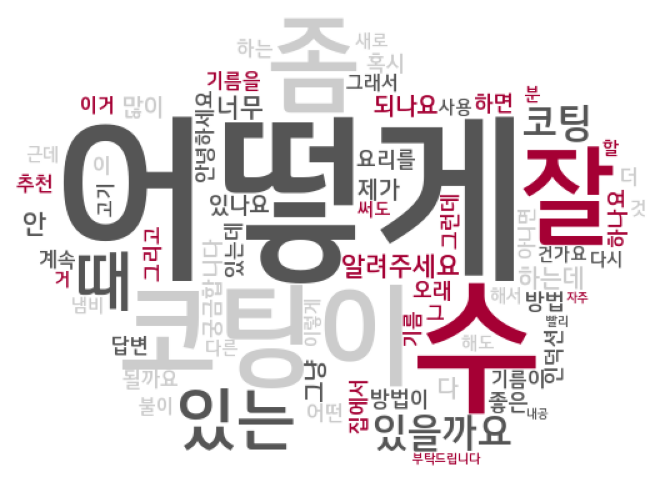

In [37]:
import random

def lg_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#A50034", "#555555", "#CCCCCC"]  # LG 전자 주요 색상 (빨강, 회색 계열)
    return random.choice(colors)

wc_rs = wc.generate_from_frequencies(freq_dict)

wc.recolor(color_func=lg_color_func)

plt.figure(figsize=(16,6))
plt.imshow(wc_rs)
plt.axis('off')
plt.show()

In [39]:
count_word_df = pd.DataFrame(list(freq_dict.items()), columns=['Word', 'Frequency'])
count_word_df

,Word,Frequency
0,어떻게,283
1,수,177
2,코팅이,174
3,잘,159
4,좀,154
...,...,...
65,다른,45
66,부탁드립니다,45
67,자주,44
68,내공,43


In [111]:
count_word_df.to_csv("count_word_df_태블로용.csv", encoding='euc-kr')

### 형태소 분석 진행

In [41]:
from kiwipiepy import Kiwi
Kiwi = Kiwi()

In [43]:
df.head()

,content,content_clean,remove_one_word_tagged_content
0,코팅 프라이팬 좋은 거 뭐 있나요??제일 유명한 코팅 프라이팬이 먼가용? 가격대 상...,코팅 프라이팬 좋은 거 뭐 있나요제일 유명한 코팅 프라이팬이 먼가용 가격대 상관없이...,"['코팅', '프라이팬', '좋다', '제일', '유명하다', '코팅', '프라이팬..."
1,고기나 야채 삶아서 먹을 때 프라이팬 조리시보다 급격히...고기나 야채 삶아서 먹을...,고기나 야채 삶아서 먹을 때 프라이팬 조리시보다 급격히고기나 야채 삶아서 먹을 때 ...,"['고기', '야채', '삶다', '먹다', '프라이팬', '조리', '시보', '..."
2,프라이팬 화상 연고 추천요리하다가 프라이팬이 떨어지려고 하길래 놀라서 프라이팬 손잡...,프라이팬 화상 연고 추천요리하다가 프라이팬이 떨어지려고 하길래 놀라서 프라이팬 손잡...,"['프라이팬', '화상', '연고', '추천', '요리', '다가', '프라이팬',..."
3,닭가슴살이 프라이팬에서 자꾸 타는데 좋은 방법은?닭가슴살이 프라이팬에서 자꾸 타는데...,닭가슴살이 프라이팬에서 자꾸 타는데 좋은 방법은닭가슴살이 프라이팬에서 자꾸 타는데 ...,"['가슴', '살이', '프라이팬', '자꾸', '좋다', '방법', '가슴', '..."
4,프라이팬 기름때 제거 어떻게 할까요ㅠㅠ프라이팬에 기름때? 가 저렇게 생겼는데 제거 ...,프라이팬 기름때 제거 어떻게 할까요프라이팬에 기름때 가 저렇게 생겼는데 제거 어떻게...,"['프라이팬', '기름', '제거', '프라이팬', '기름', '가다', '생기다'..."


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   content                         1352 non-null   object
 1   content_clean                   1352 non-null   object
 2   remove_one_word_tagged_content  1352 non-null   object
dtypes: object(3)
memory usage: 31.8+ KB


In [47]:
qna_clean_morphs = [] # 전체리스트 생성

for doc in tqdm(df['content_clean']):
    doc_merge = ''.join(doc)
    doc_merphs = Kiwi.tokenize(doc_merge)  
    morphs_list = []
    for t in doc_merphs:
        if t.tag in ["NNG","VV","VA"]: # 일반명사, 동사, 형용사만 추출
            morphs_list.append(t.form)
    qna_clean_morphs.append(' '.join(morphs_list))

100%|█████████████████████████████████████████████████████████████████████████████| 1352/1352 [00:08<00:00, 165.28it/s]


In [48]:
qna_clean_morphs[:8]

['코팅 프라이팬 좋 있 유명 코팅 프라이팬 멀 가용 가격대 알리',
 '고기 야채 삶 먹 때 프라이팬 조리 시 고기 야채 삶 먹 때 프라이팬 조리 시 심장 뛰 이유',
 '프라이팬 화상 연고 추천 요리 하 프라이팬 떨어지 하 놀라 프라이팬 손잡이 불 달구 부분 르 사진 보이 물집 생기 반대쪽 손 빨개지 쓰라리 쓰라리 공휴일 주변 문 열 병원 없 약국 가 화상 연고 사 되',
 '닭 가슴살 프라이팬 타 좋 방법 닭 가슴살 프라이팬 타 좋 방법',
 '프라이 팬 기름 때 제거 하 프라이팬 기름때 생기 제거 하 베이킹 소다 하 지우 방법 알리 프라이팬 제품명 알 있 지우 똑같 사',
 '프라이팬 일반 후라이팬 다르 프라이팬 검색 프라이팬 일반 후라이팬 나오 친구 집들이 선물 프라이팬 사 하 일반 후라이팬 다르 주방 용품 모르 프라이팬 알아보 좋 모르 집 선물 괜찮 프라이팬 있 추천 부탁드리',
 '프라이팬 추천 쓰 괜찮 없 집 있 프라이팬 산지 개월 되 코팅 벗기 코팅 좋 오래가 있 사 이제 인터넷 코팅 좋 하 좋 모르 돈 산 프라이팬 추천 부탁드리',
 '프라이팬 냄비 버리 법 인덕 시 용 프라이팬 냄비 버리 넣 구멍 없 분리 되']

In [89]:
len(qna_clean_morphs)

1352

In [61]:
token_list_morphs = [t for doc in qna_clean_morphs for t in word_tokenize(doc)]
counter_morphs = Counter(token_list_morphs)

wc = WordCloud(background_color='white', random_state=20, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_dict = {k:v for k,v in counter_morphs.most_common(70)}
freq_dict

{'프라이팬': 3126,
 '하': 1127,
 '있': 823,
 '되': 662,
 '코팅': 486,
 '사용': 476,
 '때': 427,
 '먹': 419,
 '쓰': 380,
 '좋': 371,
 '방법': 346,
 '없': 333,
 '기름': 330,
 '요리': 312,
 '같': 280,
 '사': 225,
 '벗겨지': 219,
 '붙': 216,
 '알리': 211,
 '냄비': 206,
 '집': 196,
 '타': 189,
 '추천': 181,
 '팬': 180,
 '닦': 180,
 '불': 177,
 '나': 159,
 '정도': 156,
 '알': 152,
 '계란': 147,
 '음식': 145,
 '고기': 142,
 '드리': 134,
 '물': 134,
 '나오': 132,
 '버리': 122,
 '괜찮': 119,
 '넣': 119,
 '궁금하': 117,
 '냄새': 116,
 '프라이': 115,
 '후라이팬': 115,
 '가': 111,
 '부탁': 110,
 '조리': 108,
 '제거': 108,
 '제품': 108,
 '모르': 107,
 '만드': 105,
 '보': 101,
 '만들': 94,
 '누르': 91,
 '가능': 90,
 '두르': 88,
 '세척': 88,
 '설거지': 87,
 '말': 85,
 '안녕': 84,
 '생선': 84,
 '전': 82,
 '답변': 81,
 '맞': 78,
 '후라이': 78,
 '남': 77,
 '많': 76,
 '달구': 73,
 '주방': 73,
 '부분': 72,
 '구매': 72,
 '생기': 71}

In [87]:
len(freq_dict)

70

In [65]:
filtered_word_counts = {key: value for key, value in freq_dict.items() if len(key) > 1}
filtered_word_counts

{'프라이팬': 3126,
 '코팅': 486,
 '사용': 476,
 '방법': 346,
 '기름': 330,
 '요리': 312,
 '벗겨지': 219,
 '알리': 211,
 '냄비': 206,
 '추천': 181,
 '정도': 156,
 '계란': 147,
 '음식': 145,
 '고기': 142,
 '드리': 134,
 '나오': 132,
 '버리': 122,
 '괜찮': 119,
 '궁금하': 117,
 '냄새': 116,
 '프라이': 115,
 '후라이팬': 115,
 '부탁': 110,
 '조리': 108,
 '제거': 108,
 '제품': 108,
 '모르': 107,
 '만드': 105,
 '만들': 94,
 '누르': 91,
 '가능': 90,
 '두르': 88,
 '세척': 88,
 '설거지': 87,
 '안녕': 84,
 '생선': 84,
 '답변': 81,
 '후라이': 78,
 '달구': 73,
 '주방': 73,
 '부분': 72,
 '구매': 72,
 '생기': 71}

In [85]:
len(filtered_word_counts)

43

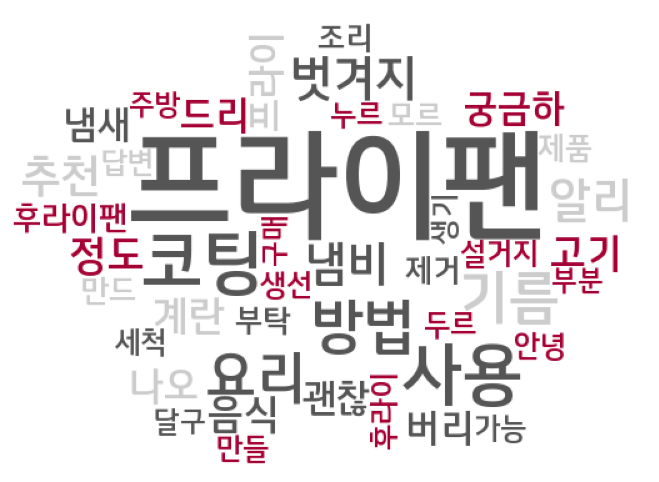

In [71]:
import random
mask_sam = np.array(Image.open('./data/mask-cloud.png'))

wc = WordCloud(background_color='white', random_state=20, 
               mask = mask_sam, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
def lg_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#A50034", "#555555", "#CCCCCC"]  # LG 전자 주요 색상 (빨강, 회색 계열)
    return random.choice(colors)

wc_rs = wc.generate_from_frequencies(filtered_word_counts)

wc.recolor(color_func=lg_color_func)

plt.figure(figsize=(16,6))
plt.imshow(wc_rs)
plt.axis('off')
plt.show()

In [77]:
filtered_word_counts

{'프라이팬': 3126,
 '코팅': 486,
 '사용': 476,
 '방법': 346,
 '기름': 330,
 '요리': 312,
 '벗겨지': 219,
 '알리': 211,
 '냄비': 206,
 '추천': 181,
 '정도': 156,
 '계란': 147,
 '음식': 145,
 '고기': 142,
 '드리': 134,
 '나오': 132,
 '버리': 122,
 '괜찮': 119,
 '궁금하': 117,
 '냄새': 116,
 '프라이': 115,
 '후라이팬': 115,
 '부탁': 110,
 '조리': 108,
 '제거': 108,
 '제품': 108,
 '모르': 107,
 '만드': 105,
 '만들': 94,
 '누르': 91,
 '가능': 90,
 '두르': 88,
 '세척': 88,
 '설거지': 87,
 '안녕': 84,
 '생선': 84,
 '답변': 81,
 '후라이': 78,
 '달구': 73,
 '주방': 73,
 '부분': 72,
 '구매': 72,
 '생기': 71}

In [81]:
pen_word = pd.DataFrame(list(filtered_word_counts.items()), columns=['Word', 'Count'])
pen_word

,Word,Count
0,프라이팬,3126
1,코팅,486
2,사용,476
3,방법,346
4,기름,330
5,요리,312
6,벗겨지,219
7,알리,211
8,냄비,206
9,추천,181


In [93]:
pen_word.to_csv("pan_count_word_태블로용.csv", encoding='utf-8-sig')